**Question **


You have learned fuzzy logic and fuzzy based modelling technique using python environment. In this assignment, you are required to identify a problem which considers at least 3 variables to determine the ultimate outcome from the variables. You are not allowed to use tipping problem that has been demonstrated in the class room. 


**Solution **

The problem that will be used to complete this assignment is setting the price of student accomodation. The variables that will be used to determine the price of student accomodation are listed below; 

accomodation_size, 
type_of_accomodation, 
credit_history,
age_of_building, and 
location_of_building.

In [1]:
#installing the scikit-fuzzy library
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 4.4MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894069 sha256=c53a0e40eb5573cd7161307a063bd63c53bf06e30e4afe390ac9e2cd607527a9
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [2]:
#importing the needed libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctl

In [3]:
# setting variable parameters 
accomodation_size = ctl.Antecedent(np.arange(0, 11,1), 'size')
type_of_accomodation = ctl.Antecedent(np.arange(0,11,1), 'type')
credit_history = ctl.Antecedent(np.arange(0,11,2), 'credit')
age_of_building = ctl.Antecedent(np.arange(0,11,2), 'age')
location_of_building = ctl.Antecedent(np.arange(0,11,1), 'location')
price_of_accomodation = ctl.Consequent(np.arange(500,3001,50), 'pricee')

In [4]:
#automatically assigning membership.
#accomodation size is either small, medium or large. 
#type of accomodation is either single living, 2-person shared, multiple shared
#credit history is either very poor, poor, average, good, excellent.
#age of building is either very old, old, fairly new, new, brand new. 
#location is either bad, average, good.
#price is either very cheap, cheap, average, expensive, very expensive
accomodation_size.automf(3)
type_of_accomodation.automf(3)
credit_history.automf(5)
age_of_building.automf(5)
location_of_building.automf(3)
price_of_accomodation.automf(5)

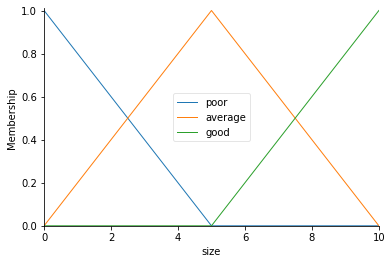

In [5]:
accomodation_size.view()

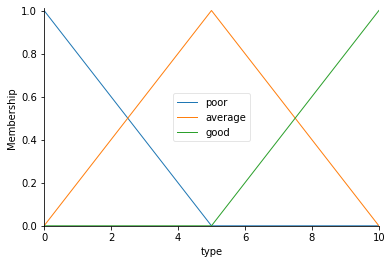

In [6]:
type_of_accomodation.view()

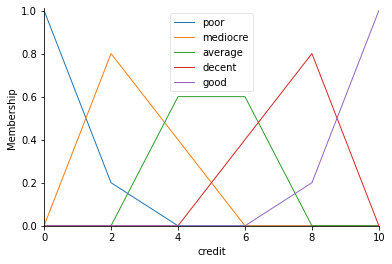

In [7]:
credit_history.view()

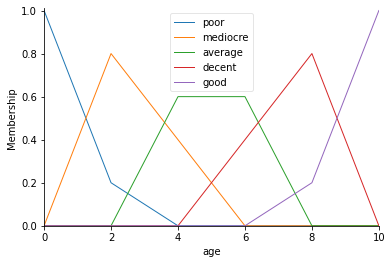

In [8]:
age_of_building.view()

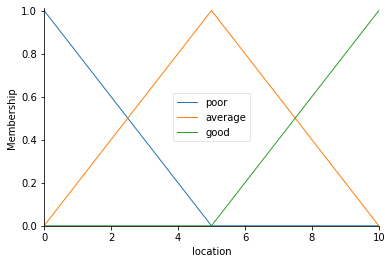

In [9]:
location_of_building.view()

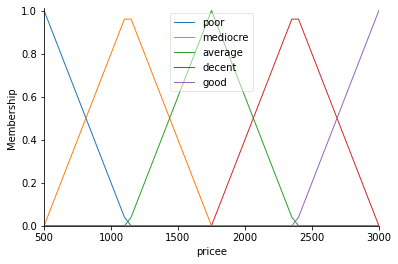

In [10]:
price_of_accomodation.view()

In [11]:
#defining the rules
rule1 = ctl.Rule(accomodation_size['poor'] & type_of_accomodation['poor'] & credit_history['poor'] & age_of_building['poor'] & location_of_building['poor'], price_of_accomodation['poor'])
rule2 = ctl.Rule(accomodation_size['poor'] & type_of_accomodation['poor'] & credit_history['mediocre'] & age_of_building['mediocre'] & location_of_building['poor'], price_of_accomodation['mediocre'])
rule3 = ctl.Rule(accomodation_size['average'] & type_of_accomodation['average'] & credit_history['average'] & age_of_building['average'] & location_of_building['average'], price_of_accomodation['average'])
rule4 = ctl.Rule(accomodation_size['average'] & type_of_accomodation['average'] & credit_history['decent'] & age_of_building['decent'] & location_of_building['average'], price_of_accomodation['decent'])
rule5 = ctl.Rule(accomodation_size['good'] & type_of_accomodation['good'] & credit_history['good'] & age_of_building['good'] & location_of_building['good'], price_of_accomodation['good'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbc16837190>)

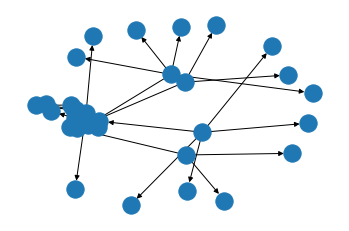

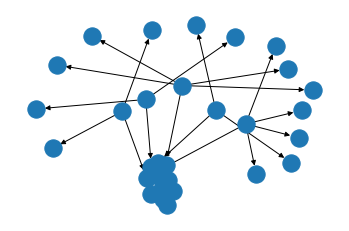

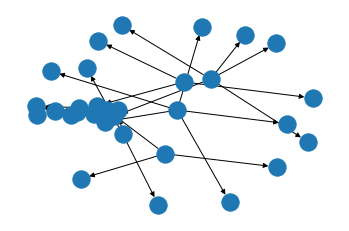

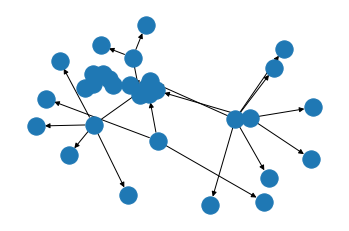

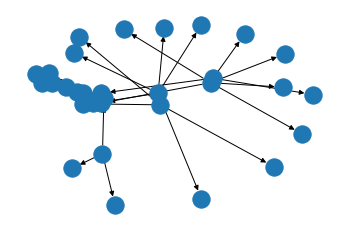

In [12]:
rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()

In [13]:
#setting controls for the price of accomodation
price_control = ctl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
price = ctl.ControlSystemSimulation(price_control)

In [14]:
#inputing values to get a price prediction
price.input['size'] = 2.1
price.input['type'] = 4.5
price.input['credit'] = 6.7
price.input['age'] = 8.2
price.input['location'] = 7.9
price.compute()
print (price.output)

OrderedDict([('pricee', 2375.0000000000005)])


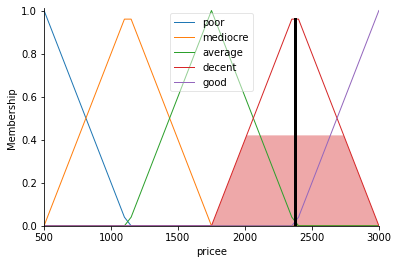

In [15]:
price_of_accomodation.view(sim=price)